### ResNet50

Previous example: [/examples/tensorboard.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/tensorboard.ipynb)  
Modified from: [keras.io/api/applications/](https://keras.io/api/applications/)  
Next example: [/examples/keras_applications/intermediate_layers.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/keras_applications/intermediate_layers.ipynb)

In [1]:
import sys
sys.path.insert(0, '../../') # To be able to reach 'datasets' folder
from pathlib import Path
from IPython.display import Image
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
model = ResNet50(weights='imagenet')

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-12-22 22:29:10.374943: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-22 22:29:10.375366: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


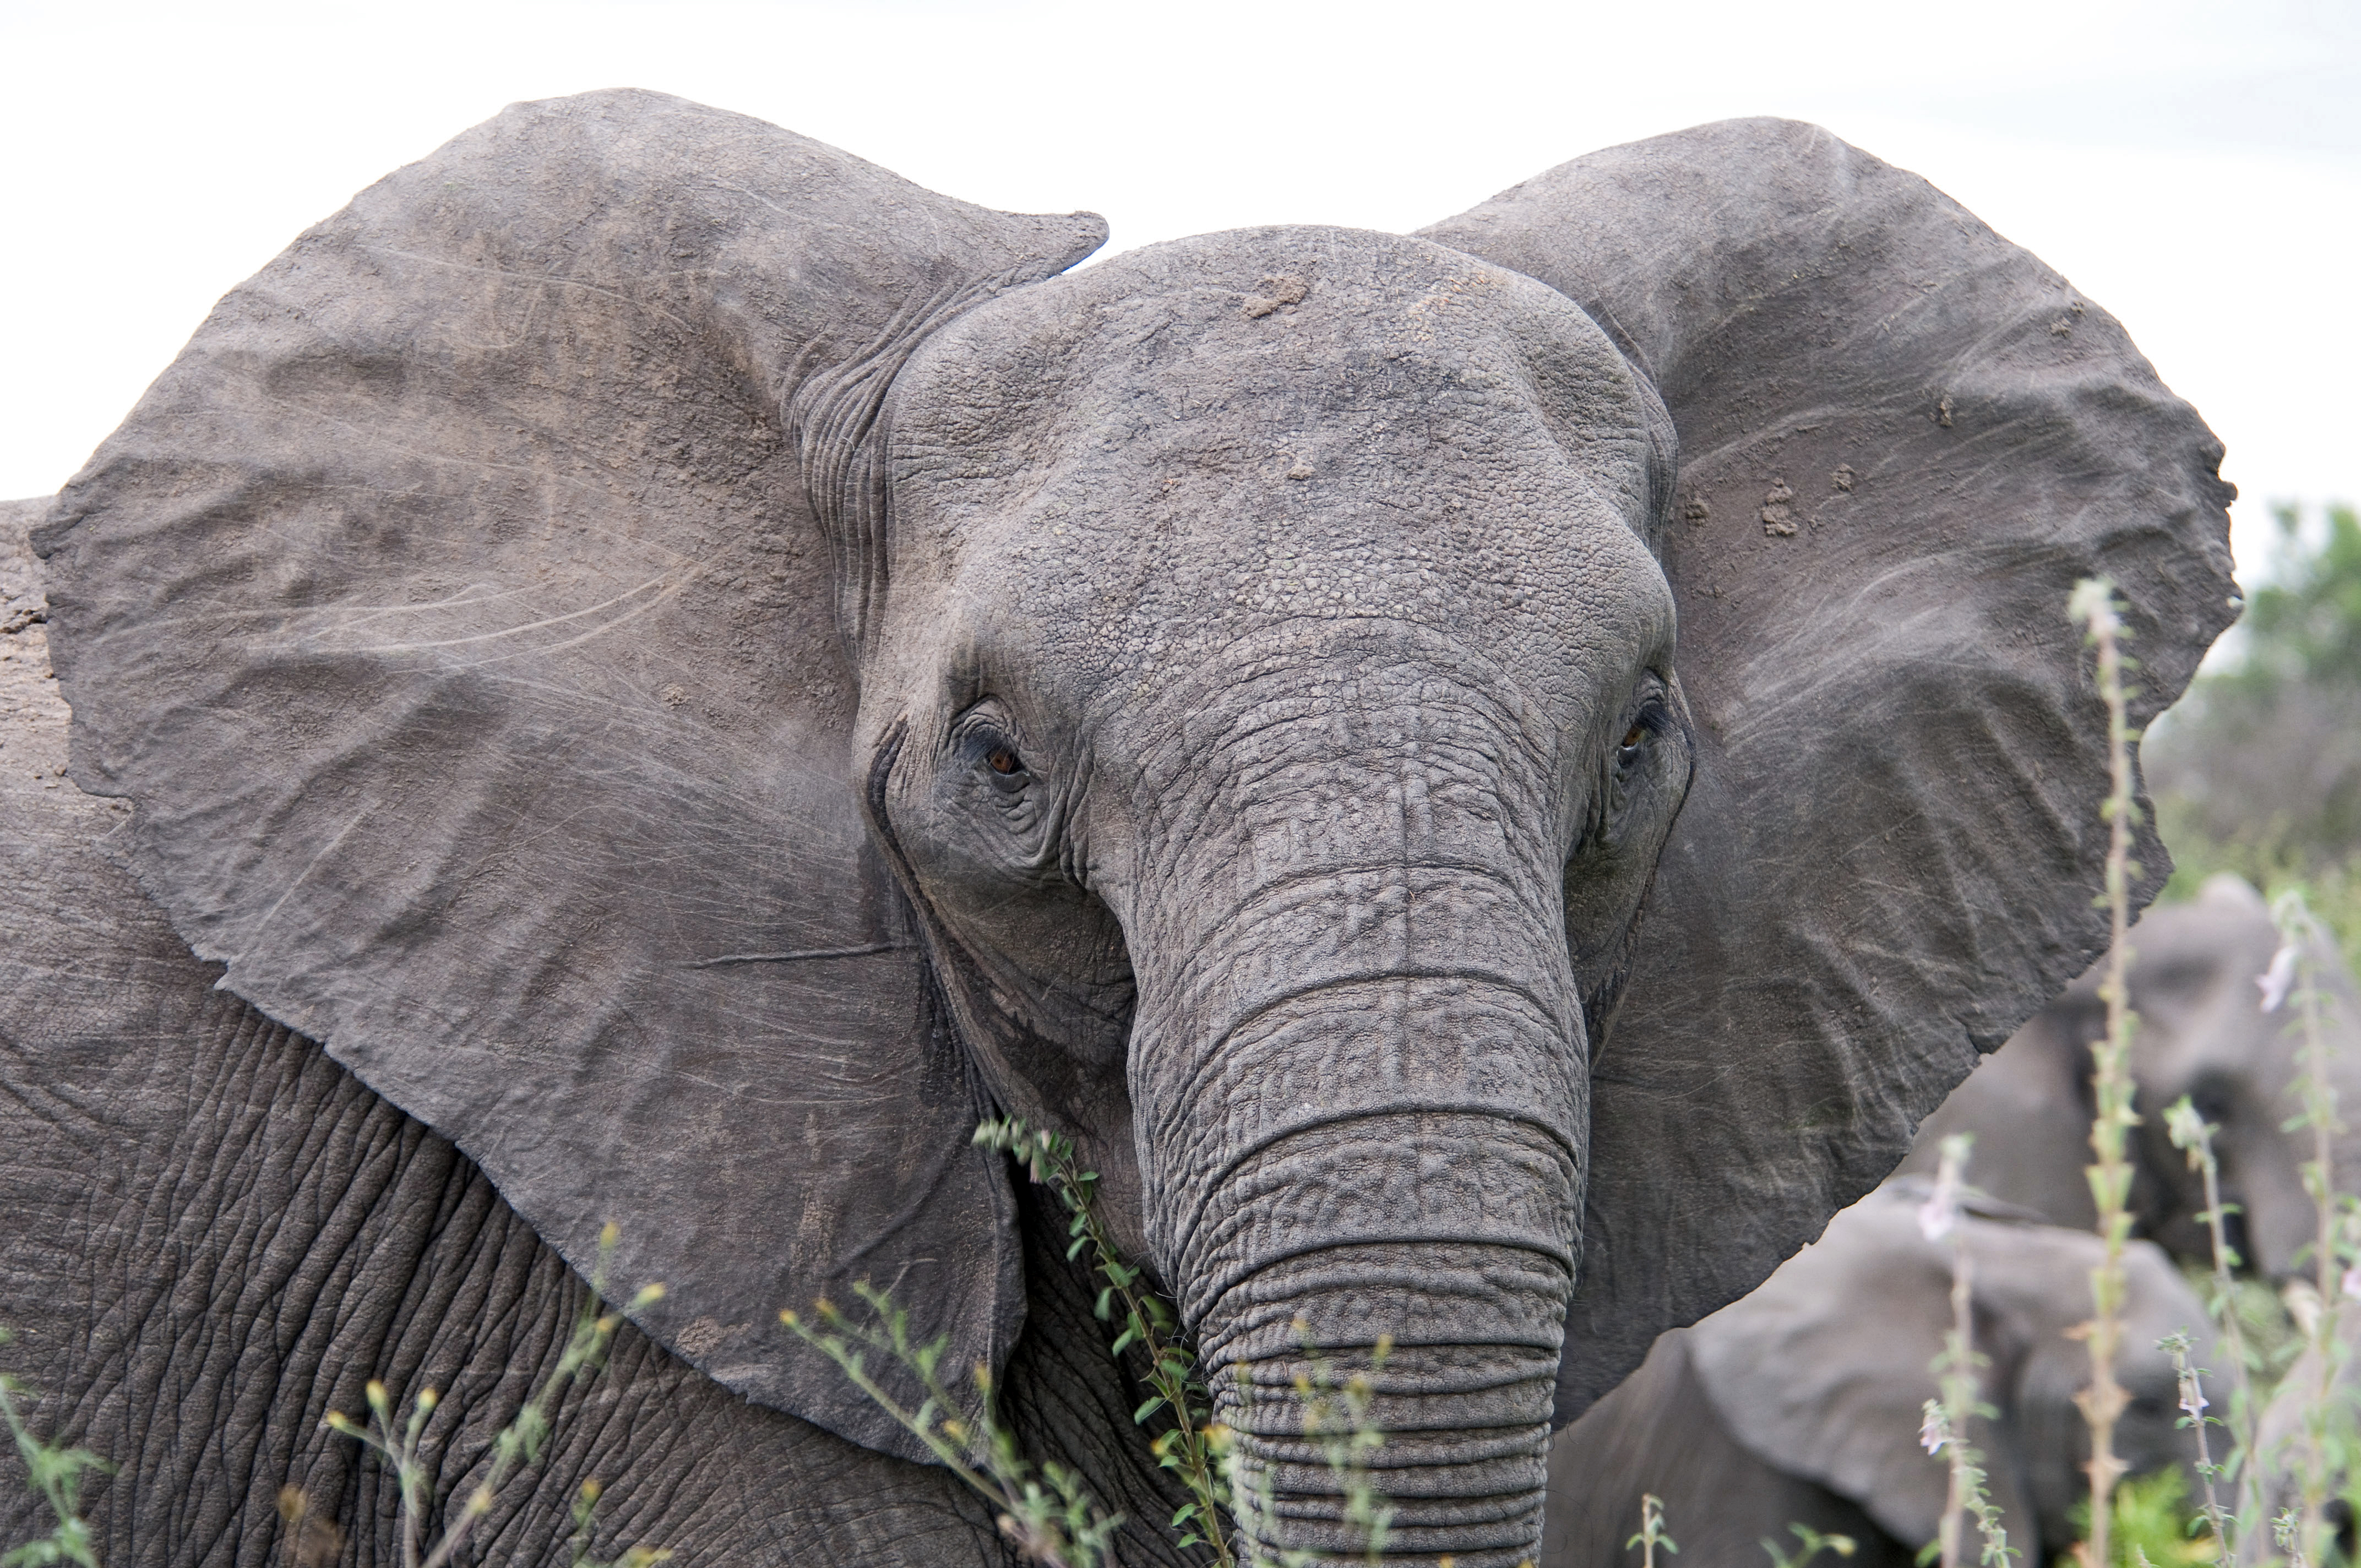

In [3]:
img_path = Path.cwd().parent.parent / 'datasets' / 'Angry_elephant_ears.jpg' # https://en.wikipedia.org/wiki/Elephant
Image(img_path, width=300)

In [4]:
array_image = img_to_array(load_img(img_path, target_size=(224, 224)))
expanded_image = np.expand_dims(array_image, axis=0)
processed_image = preprocess_input(expanded_image)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(model.predict(processed_image), top=3)[0])

2022-12-22 22:29:12.235679: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-22 22:29:12.515349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 764ms/step
Predicted: [('n02504458', 'African_elephant', 0.8454672), ('n01871265', 'tusker', 0.12108592), ('n02504013', 'Indian_elephant', 0.030460557)]


In [5]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Previous example: [/examples/tensorboard.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/tensorboard.ipynb)  
Modified from: [keras.io/api/applications/](https://keras.io/api/applications/)  
Next example: [/examples/keras_applications/intermediate_layers.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/keras_applications/intermediate_layers.ipynb)